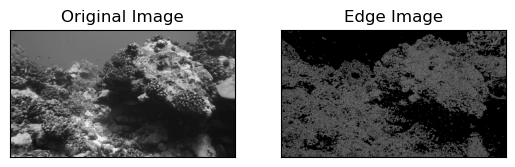

In [4]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('/Users/ugo/Documents/rugosity/images/Ha18m2008.05.JPG', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
edges = cv.Canny(img, 0, 50)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [1]:
import sys
sys.path.append("/Users/ugo/Documents/rugosity/")

In [3]:
from utils.sam_utils import load_predictor
predictor = load_predictor(sam_checkpoint="/Users/ugo/Documents/rugosity/sam_vit_b_01ec64.pth")

In [5]:
points = [(1314, 150)]

In [107]:
import pickle
# with open("../contours.pickle", "rb") as contour:
#     contours = pickle.load(contour)
# with open("../edges.pickle", "rb") as edge:
#     edges = pickle.load(edge)

# with open("../mask.pk", "rb") as m:
#     mask = pickle.load(m)

with open("../contour.pickle", "rb") as m:
    contour_ = pickle.load(m)

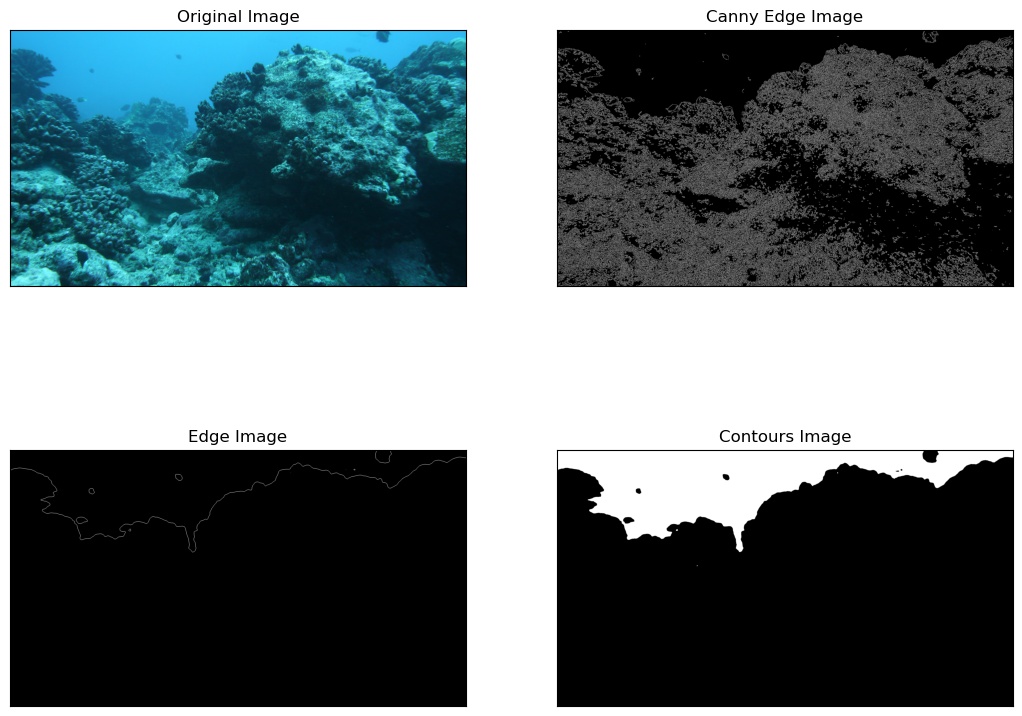

In [109]:
from matplotlib import pyplot as plt
import cv2
from utils.image_utils import load_image

img = load_image('../images/Ha18m2010.02.JPG')
edges_canny = cv2.Canny(img, 0, 50)
plt.figure(figsize=(20, 20))
plt.subplot(231),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(232),plt.imshow(edges_canny, cmap = 'gray')
plt.title('Canny Edge Image'), plt.xticks([]), plt.yticks([])
plt.subplot(131),plt.imshow(edges, cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(mask, cmap = 'gray')
plt.title('Contours Image'), plt.xticks([]), plt.yticks([])
plt.show()  

In [65]:
img.shape

(1728, 3072, 3)

In [112]:
def find_edges(mask):
    """
    Mathematical method to find the edge using np.gradient"""
    gx, gy = np.gradient(mask * 1)
    edges = gy * gy + gx * gx
    edges[edges != 0.0] = 1
    edges = np.asarray(edges, dtype=np.uint8)
    return edges

len(contour_)

8317

In [113]:
cv2.arcLength(contour_, True), cv2.arcLength(contour_, False)

(9640.412254452705, 9639.412254452705)

In [18]:
from utils.mask_utils import find_longest_contour_index


longest_contour_idx = find_longest_contour_index(contours)
longest_contour = contours[longest_contour_idx]
len(longest_contour)

8333

In [67]:
len(longest_contour)

8333

In [68]:
import numpy as np

def get_matrix_from_contour(contour, img):
    contour_image = np.zeros(img.shape[:2])
    verts = contour.reshape(contour.shape[0], contour.shape[2])
    row_indices = verts[:, 1]
    col_indices = verts[:, 0]
    contour_image[row_indices, col_indices]=1
    return contour_image

In [71]:
contour_image = get_matrix_from_contour(longest_contour, img)
contour_image.sum()

8333.0

In [85]:
contour_test = contour_image[360:410, 260:272]
contour_test

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0.,

In [87]:
contour_test.sum(), get_thiner_contour(contour_test).sum()

(56.0, 12.0)

In [72]:
contour_image_test = np.array(
    [[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
    [0., 0., 1., 0., 0., 0., 0., 0., 1., 0.],
    [0., 0., 1., 1., 1., 0., 0., 0., 1., 0.],
    [0., 0., 0., 1., 1., 0., 0., 1., 0., 0.],
    [1., 1., 1., 1., 0., 1., 1., 1., 0., 0.],
    [1., 1., 1., 1., 0., 1., 1., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [64]:
def get_thiner_contour(original_matrix):
    matrix = np.zeros(original_matrix.shape)
    indices = np.argmax(original_matrix == 1, axis=0)
    matrix[indices, np.arange(original_matrix.shape[1])]=1
    return matrix

get_thiner_contour(contour_image).sum()

3072.0

In [61]:
def from_image_to_contour(contour_image):
    coordinates = np.argwhere(get_thiner_contour(contour_image) == 1)
    return np.flip(coordinates).reshape((len(coordinates), 1, 2))

array([[[1233,  692]],

       [[1232,  692]],

       [[1231,  692]],

       ...,

       [[3029,   53]],

       [[3028,   53]],

       [[3027,   53]]])

In [60]:
len(coordinates)

3072

In [ ]:
with open("mask.pk", "wb") as f:
    pickle.dump(mask, f)